# Task 2:Data Analysis and Insights Generation using Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("C:/Users/HP/Downloads/DA -Task 2.xlsx")
df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


# Exploratory Data Analysis

In [3]:
print(df.info())
print("\n--- Initial Nulls and Uniques ---\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [4]:
for col in df.columns:
    print(f"\n🔹 Column: {col}")
    print(f"Data Type: {df[col].dtype}")
    print(f"Missing Values: {df[col].isnull().sum()}")
    print(f"Unique Values: {df[col].nunique()}")
    if df[col].dtype == 'object':
        print(df[col].value_counts(dropna=False).head())
    else:
        print(df[col].describe())


🔹 Column: VIN
Data Type: object
Missing Values: 0
Unique Values: 98
VIN
3HRS9EED0LH255650    2
1HRFFHEL8RZ133325    2
1HRFFEE8XSZ230636    1
3HCFDDE89SH220903    1
1HRFFHEL1RZ181474    1
Name: count, dtype: int64

🔹 Column: TRANSACTION_ID
Data Type: int64
Missing Values: 0
Unique Values: 32
count      100.000000
mean     13036.900000
std         12.028166
min      13021.000000
25%      13027.750000
50%      13036.000000
75%      13041.250000
max      13081.000000
Name: TRANSACTION_ID, dtype: float64

🔹 Column: CORRECTION_VERBATIM
Data Type: object
Missing Values: 0
Unique Values: 93
CORRECTION_VERBATIM
REPLACED STEERING WHEEL                                                                                                                                                                                                                                                         3
Steering Wheel Replacement                                                                                         

In [5]:
df.columns

Index(['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM',
       'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION',
       'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY',
       'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE',
       'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION',
       'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI',
       'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
       'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION',
       'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE',
       'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST',
       'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT',
       'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES',
       'LAST_KNOWN_D

In [6]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
TRANSACTION_ID,100.0,13036.9,13021.0,13027.75,13036.0,13041.25,13081.0,12.028166
REPAIR_DATE,100,2024-01-22 07:26:24,2024-01-02 00:00:00,2024-01-12 00:00:00,2024-01-24 12:00:00,2024-02-01 00:00:00,2024-02-07 00:00:00,NaN
DEALER_REGION,100.0,1.09,1.0,1.0,1.0,1.0,4.0,0.51434
REPAIR_AGE,100.0,14.94,0.0,5.0,12.0,21.0,50.0,12.367945
KM,100.0,24914.23,3.0,8883.25,21962.0,35493.25,107905.0,20747.078206
COMPLAINT_CD_CSI,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ORD_SELLING_SRC_CD,100.0,24.59,11.0,13.0,13.0,48.0,72.0,17.822976
GLOBAL_LABOR_CODE,100.0,251.9,20.0,130.0,130.0,130.0,2400.0,546.451722
CAMPAIGN_NBR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REPORTING_COST,100.0,531.1932,27.69,305.4325,433.97,554.0625,2457.45,411.161608


# Missing Data Imputation

In [7]:
df.drop(columns='CAMPAIGN_NBR',inplace=True)

In [8]:
cols_to_fill = [
    'CAUSAL_PART_NM', 'PLANT', 'STATE', 'VEH_TEST_GRP',
    'OPTN_FAMLY_CERTIFICATION', 'OPTF_FAMLY_EMISSIOF_SYSTEM',
    'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR',
    'TRANSMISSION_SOURCE_PLANT', 'TRANSMISSION_TRACE_NBR',
    'LINE_SERIES'
]

df[cols_to_fill] = df[cols_to_fill].fillna('Unknown')  # (corrected spelling of 'Unknown')

In [9]:
# Check how many TOTALCOST entries are missing or 0
missing_totalcost = df['TOTALCOST'].isna().sum()
zero_totalcost = (df['TOTALCOST'] == 0).sum()

print(f"Missing TOTALCOST values: {missing_totalcost}")
print(f"Zero TOTALCOST values: {zero_totalcost}")

# View basic statistics to guide imputation
print(df['TOTALCOST'].describe())


Missing TOTALCOST values: 6
Zero TOTALCOST values: 0
count      94.000000
mean      561.162128
std       452.796836
min        27.690000
25%       320.105000
50%       457.225000
75%       606.905000
max      3205.450000
Name: TOTALCOST, dtype: float64


In [10]:
# Calculate the median excluding nulls
median_totalcost = df['TOTALCOST'].median()

# Fill only the missing (NaN) values with the median
df['TOTALCOST'].fillna(median_totalcost, inplace=True)


In [11]:
df.fillna({
    'REPAIR_DLR_POSTAL_CD': 0,
    'LAST_KNOWN_DELVRY_TYPE_CD': 0
}, inplace=True)


In [12]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

cols_to_clean = ['REPAIR_AGE', 'KM', 'TOTALCOST', 'LBRCOST', 'REPORTING_COST', 'NON_CAUSAL_PART_QTY']
df = remove_outliers_iqr(df, cols_to_clean)


In [13]:
output_path = "C:/Users/HP/Downloads/task2.xlsx"
df.to_excel(output_path, index=False)
print(f" Done! Saved at: {output_path}")

 Done! Saved at: C:/Users/HP/Downloads/task2.xlsx


In [14]:
df.isnull().any()

VIN                              False
TRANSACTION_ID                   False
CORRECTION_VERBATIM              False
CUSTOMER_VERBATIM                False
REPAIR_DATE                      False
CAUSAL_PART_NM                   False
GLOBAL_LABOR_CODE_DESCRIPTION    False
PLATFORM                         False
BODY_STYLE                       False
VPPC                             False
PLANT                            False
BUILD_COUNTRY                    False
LAST_KNOWN_DLR_NAME              False
LAST_KNOWN_DLR_CITY              False
REPAIRING_DEALER_CODE            False
DEALER_NAME                      False
REPAIR_DLR_CITY                  False
STATE                            False
DEALER_REGION                    False
REPAIR_DLR_POSTAL_CD             False
REPAIR_AGE                       False
KM                               False
COMPLAINT_CD_CSI                 False
COMPLAINT_CD                     False
VEH_TEST_GRP                     False
COUNTRY_SALE_ISO         

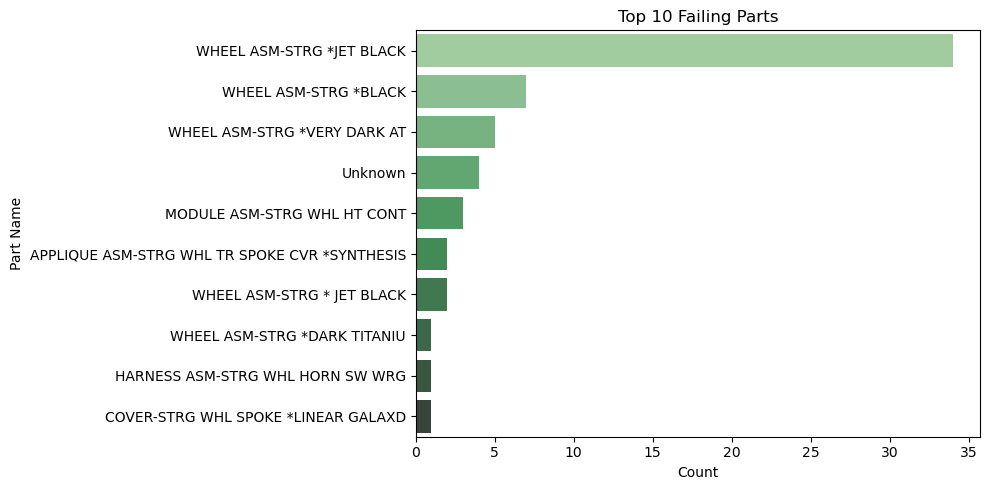

In [15]:
plt.figure(figsize=(10,5))
parts = df['CAUSAL_PART_NM'].value_counts().head(10)
sns.barplot(x=parts.values, y=parts.index, palette="Greens_d")
plt.title("Top 10 Failing Parts")
plt.xlabel("Count")
plt.ylabel("Part Name")
plt.tight_layout()
plt.show()

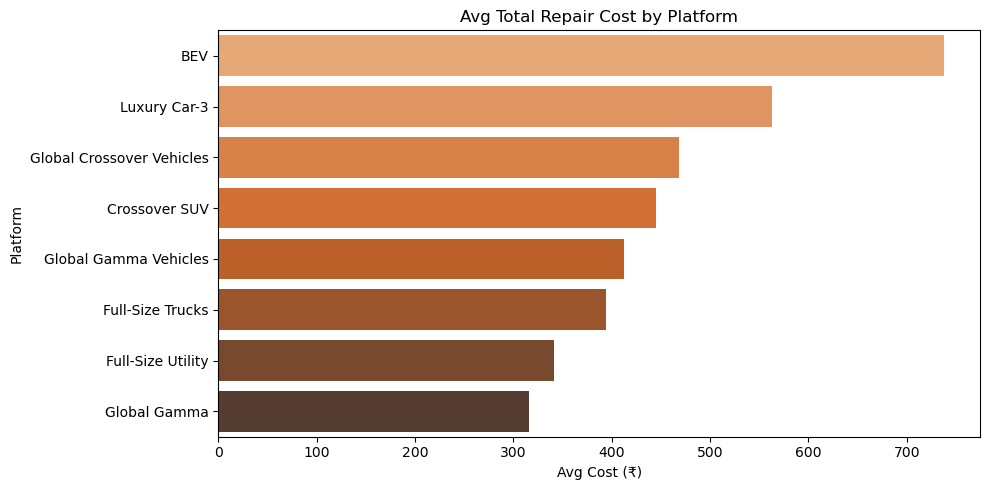

In [16]:
plt.figure(figsize=(10,5))
platform_cost = df.groupby('PLATFORM')['TOTALCOST'].mean().sort_values(ascending=False)
sns.barplot(x=platform_cost.values, y=platform_cost.index, palette="Oranges_d")
plt.title("Avg Total Repair Cost by Platform")
plt.xlabel("Avg Cost (₹)")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()

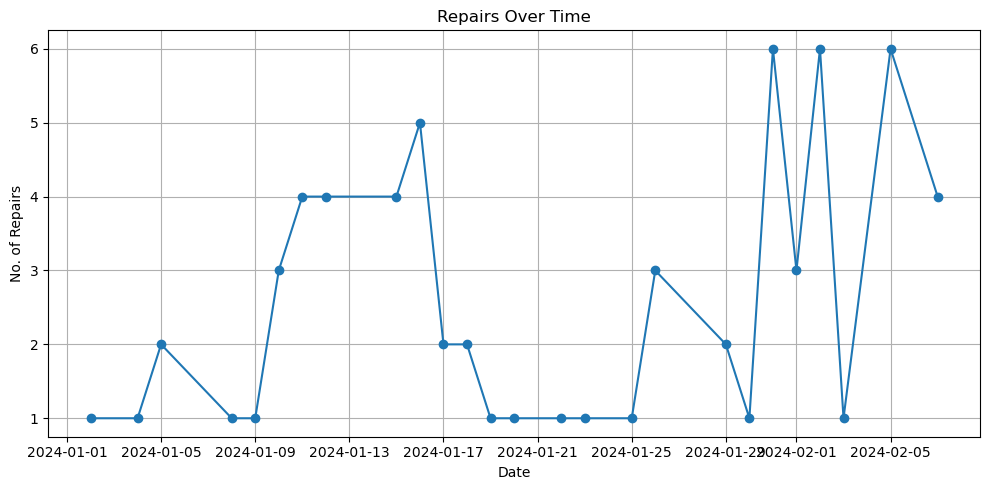

In [17]:
df['REPAIR_DATE'] = pd.to_datetime(df['REPAIR_DATE'])
repairs_over_time = df.groupby(df['REPAIR_DATE'].dt.date).size()

plt.figure(figsize=(10,5))
repairs_over_time.plot(marker='o')
plt.title("Repairs Over Time")
plt.xlabel("Date")
plt.ylabel("No. of Repairs")
plt.grid(True)
plt.tight_layout()
plt.show()


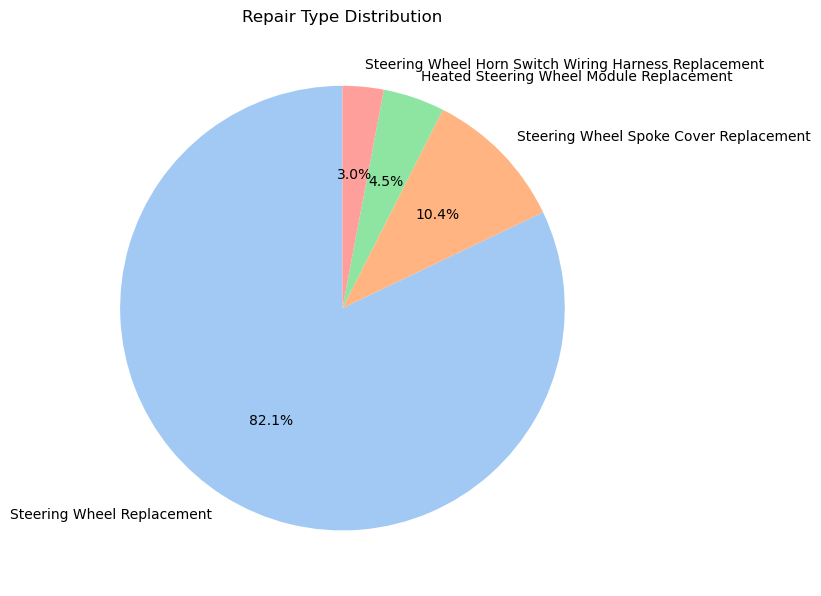

In [18]:
df['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(8,8), startangle=90, colors=sns.color_palette("pastel")
)
plt.title("Repair Type Distribution")
plt.ylabel('')
plt.tight_layout()
plt.show()


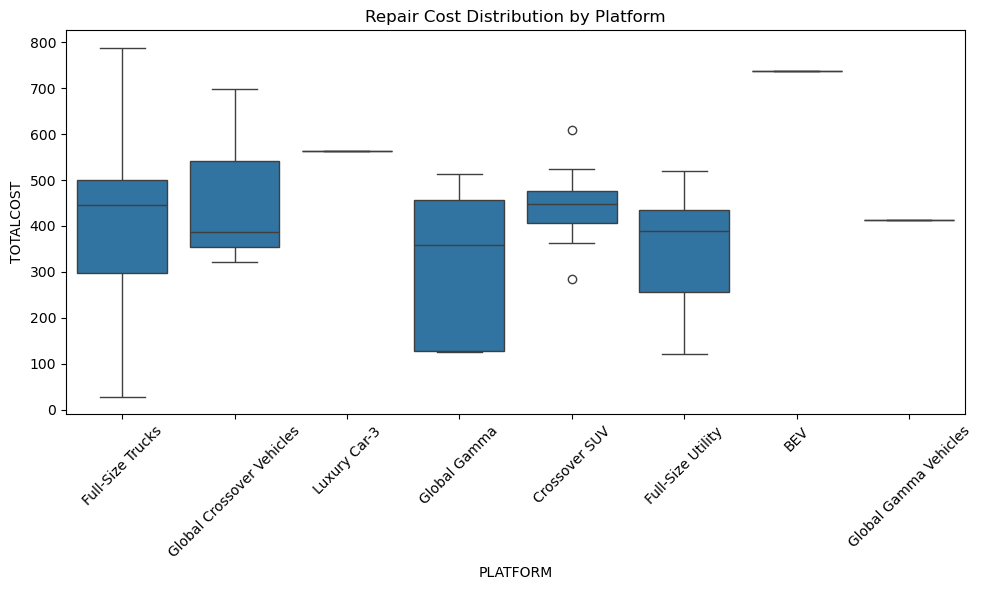

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='PLATFORM', y='TOTALCOST', data=df)
plt.xticks(rotation=45)
plt.title("Repair Cost Distribution by Platform")
plt.tight_layout()
plt.show()

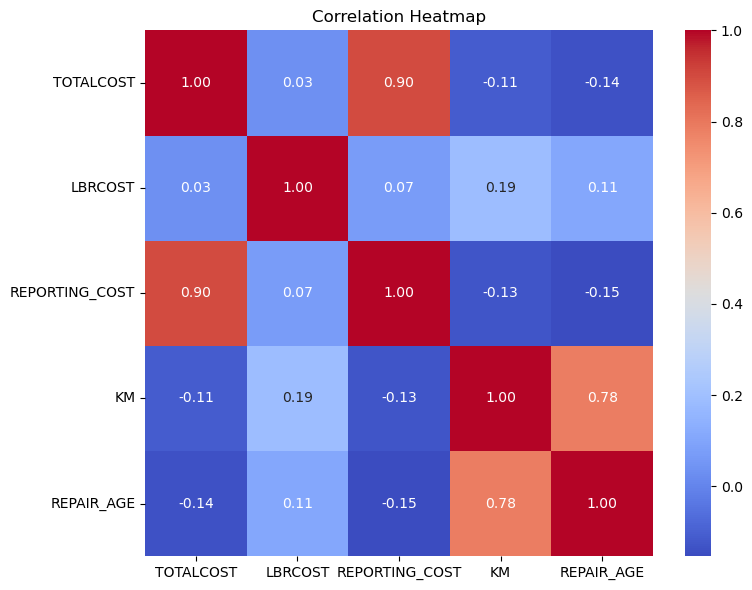

In [20]:
plt.figure(figsize=(8,6))
numeric_cols = ['TOTALCOST', 'LBRCOST', 'REPORTING_COST', 'KM', 'REPAIR_AGE']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

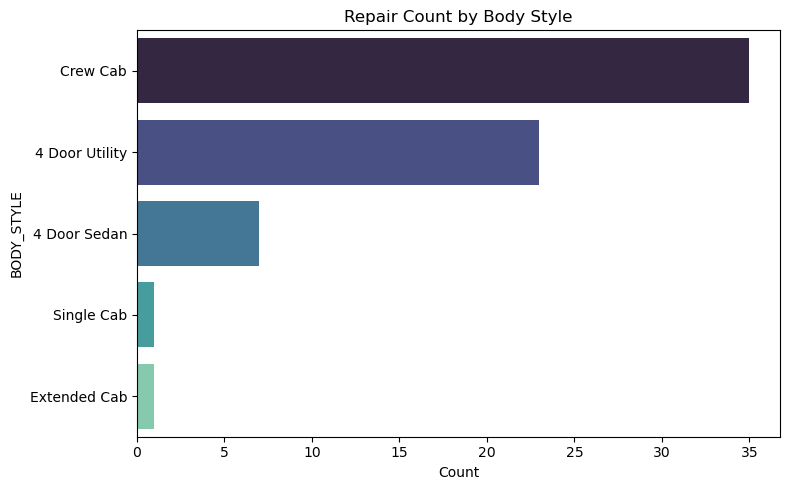

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='BODY_STYLE', order=df['BODY_STYLE'].value_counts().index, palette='mako')
plt.title("Repair Count by Body Style")
plt.xlabel("Count")
plt.tight_layout()
plt.show()


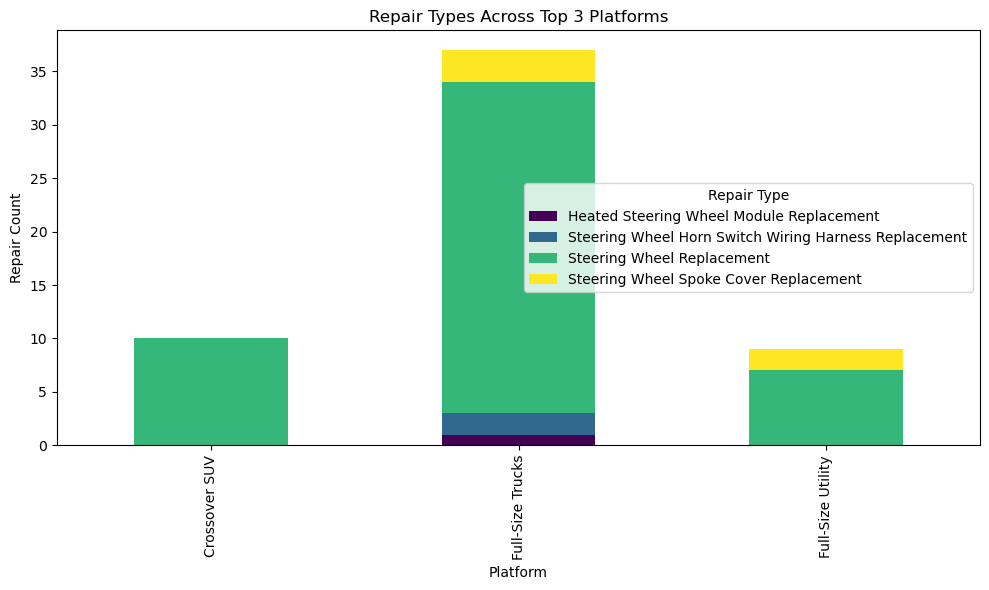

In [22]:
top_platforms = df['PLATFORM'].value_counts().head(3).index
filtered = df[df['PLATFORM'].isin(top_platforms)]

pivot = pd.crosstab(filtered['PLATFORM'], filtered['GLOBAL_LABOR_CODE_DESCRIPTION'])
pivot.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title("Repair Types Across Top 3 Platforms")
plt.xlabel("Platform")
plt.ylabel("Repair Count")
plt.legend(title="Repair Type")
plt.tight_layout()
plt.show()

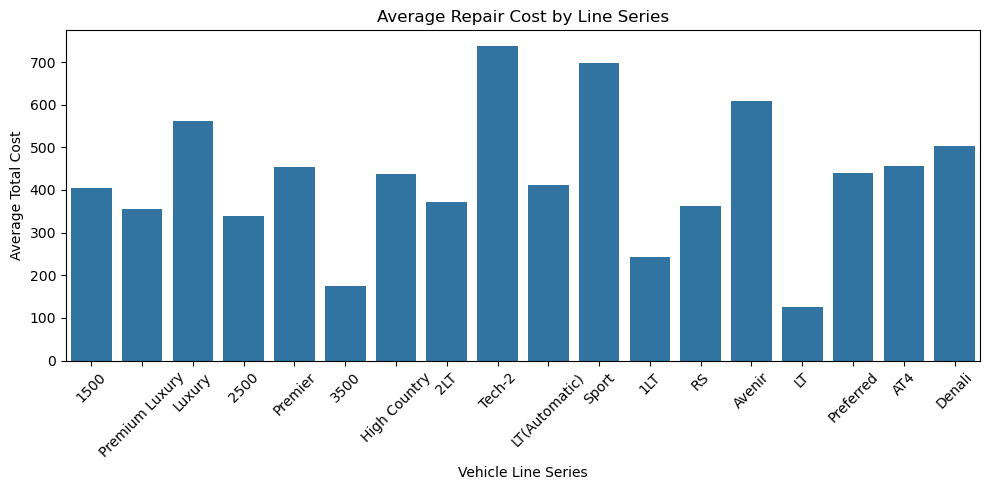

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x='LINE_SERIES', y='TOTALCOST', data=df, estimator='mean', ci=None)
plt.title('Average Repair Cost by Line Series')
plt.xlabel('Vehicle Line Series')
plt.ylabel('Average Total Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


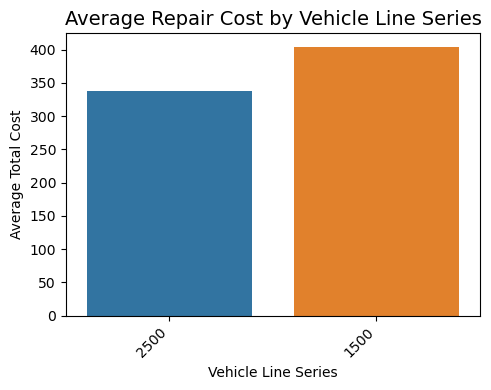

In [24]:
# Step 1: Clean the LINE_SERIES column (remove spaces, make uppercase for consistency)
df['LINE_SERIES'] = df['LINE_SERIES'].astype(str).str.strip().str.upper()

# Step 2: Filter out vehicle lines with very low frequency (say, less than 5)
line_counts = df['LINE_SERIES'].value_counts()
valid_lines = line_counts[line_counts >= 5].index
df_filtered = df[df['LINE_SERIES'].isin(valid_lines)]

# Step 3: Sort by average TOTALCOST
avg_cost_sorted = df_filtered.groupby('LINE_SERIES')['TOTALCOST'].mean().sort_values()

# Step 4: Plot
plt.figure(figsize=(5, 4))
sns.barplot(x=avg_cost_sorted.index, y=avg_cost_sorted.values, palette="tab10")
plt.xticks(rotation=45, ha='right')
plt.title("Average Repair Cost by Vehicle Line Series", fontsize=14)
plt.xlabel("Vehicle Line Series")
plt.ylabel("Average Total Cost")
plt.tight_layout()
plt.show()


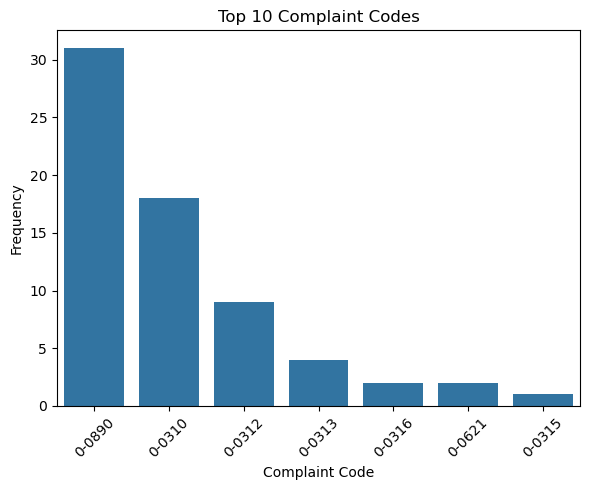

In [25]:
top_complaints = df['COMPLAINT_CD'].value_counts().head(10)

plt.figure(figsize=(6, 5))
sns.barplot(x=top_complaints.index, y=top_complaints.values)
plt.title('Top 10 Complaint Codes')
plt.xlabel('Complaint Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


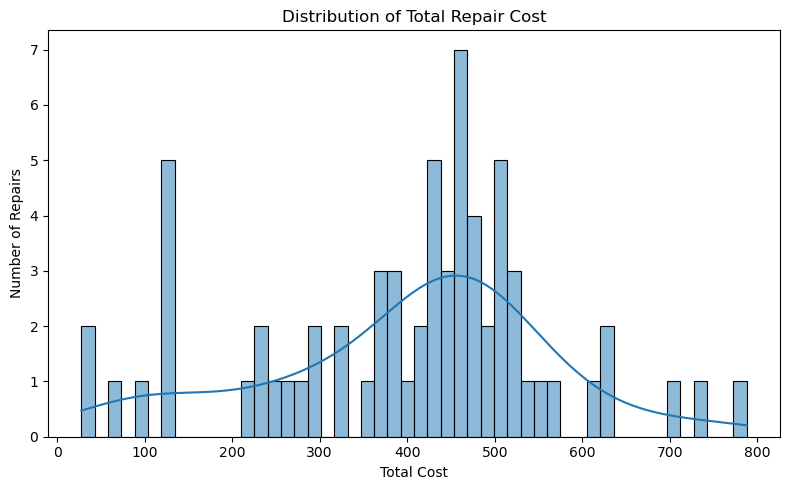

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TOTALCOST'], bins=50, kde=True)
plt.title('Distribution of Total Repair Cost')
plt.xlabel('Total Cost')
plt.ylabel('Number of Repairs')
plt.tight_layout()
plt.show()


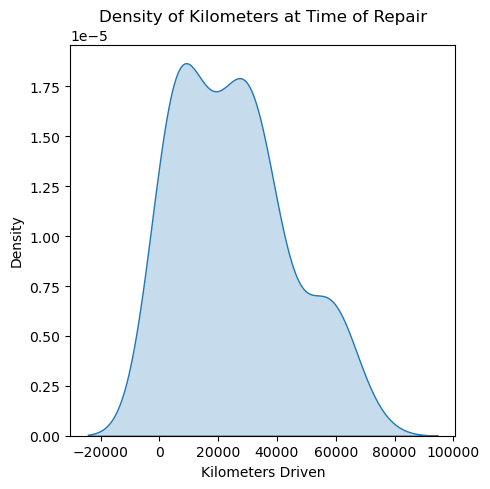

In [27]:
plt.figure(figsize=(5, 5))
sns.kdeplot(df['KM'], shade=True)
plt.title('Density of Kilometers at Time of Repair')
plt.xlabel('Kilometers Driven')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


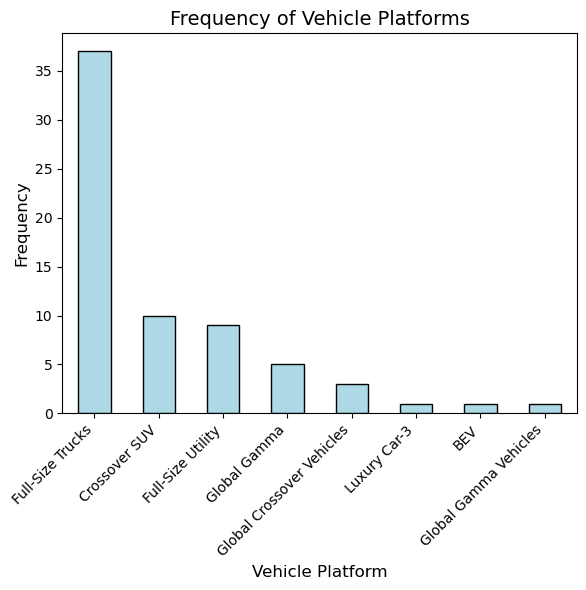

In [28]:
plt.figure(figsize=(6, 6))
df['PLATFORM'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Frequency of Vehicle Platforms', fontsize=14)
plt.xlabel('Vehicle Platform', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

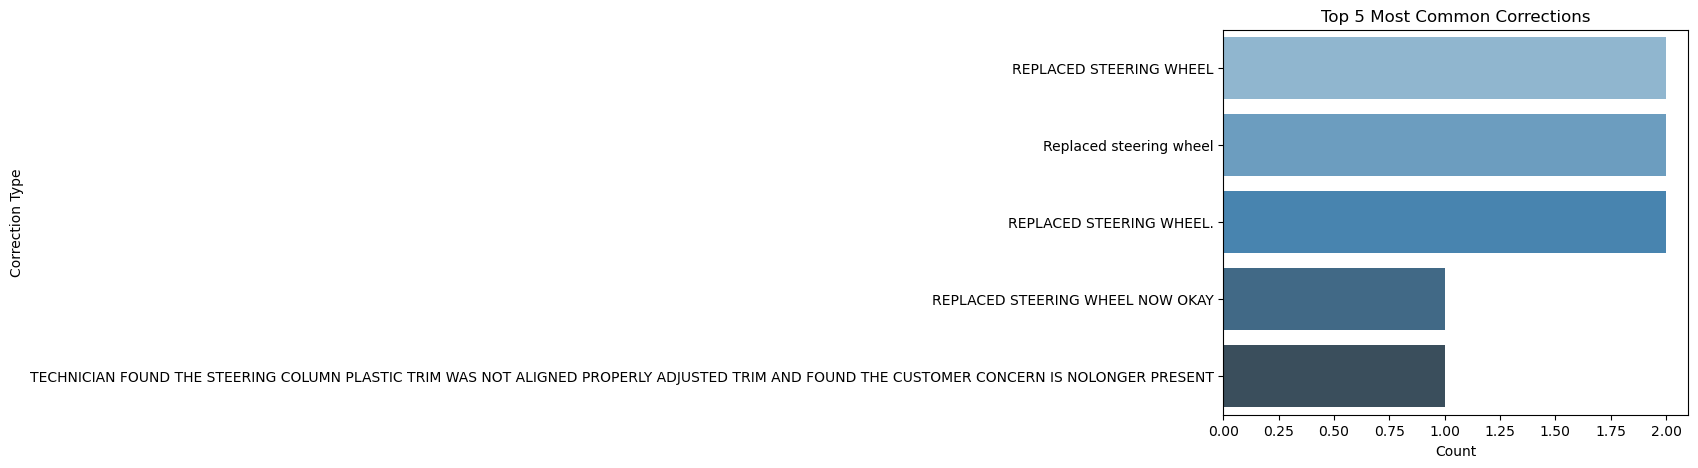

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
corrections = df['CORRECTION_VERBATIM'].value_counts().head(5)
sns.barplot(x=corrections.values, y=corrections.index, palette="Blues_d")
plt.title("Top 5 Most Common Corrections")
plt.xlabel("Count")
plt.ylabel("Correction Type")
plt.tight_layout()
plt.show()

In [30]:
!pip install openai

In [31]:
import openai
from tqdm import tqdm
import re

# Load your Excel file
df1 = pd.read_excel("C:/Users/HP/Downloads/task2.xlsx")

# Set your OpenAI API key
client = openai.OpenAI(api_key="sk-proj-t5....")  #Api key

# Combine correction + customer text
df1['combined_text'] = df1['CORRECTION_VERBATIM'].fillna('') + " " + df1['CUSTOMER_VERBATIM'].fillna('')

# Define function to call GPT
def extract_tags_from_text(text):
    prompt = f"""
You are a service data expert. Based on the following repair log text, extract tags for:
- Symptom/Condition (what was wrong)
- Component/Part (what was involved)
- Action Taken (what was done to fix it)

Example Output:
Symptom: ...
Component: ...
Action: ...

Text: \"{text}\"
Return tags in this exact format:
Symptom: ...
Component: ...
Action: ...
"""
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.2
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        return f"Error: {e}"

tqdm.pandas()
df1['GPT_TAGS'] = df1['combined_text'].progress_apply(extract_tags_from_text)

# Parse tags into separate columns
def parse_gpt_tags(text):
    if text.startswith("Error:"):
        return pd.Series([None, None, None])
    try:
        symptom = re.search(r"Symptom:\s*(.*)", text, re.IGNORECASE).group(1).strip()
        component = re.search(r"Component:\s*(.*)", text, re.IGNORECASE).group(1).strip()
        action = re.search(r"Action:\s*(.*)", text, re.IGNORECASE).group(1).strip()
        return pd.Series([symptom, component, action])
    except Exception:
        return pd.Series([None, None, None])


df1[['Symptom', 'Component', 'Action']] = df1['GPT_TAGS'].apply(parse_gpt_tags)


100%|██████████| 61/61 [02:10<00:00,  2.14s/it]


In [32]:
output_path = "C:/Users/HP/Downloads/FinalTask2Output.xlsx"
df1.to_excel(output_path, index=False)
print(f" Done! Saved at: {output_path}")

 Done! Saved at: C:/Users/HP/Downloads/FinalTask2Output.xlsx
